# Deutsch-Jozsa algorithm

Algorytm Deutcha-Jozsa jest jednym z pierwszych przykładów szybszego działania komputerów kwantowych w porównaniu z klasycznymi.

Zajmujemy się funkcją postaci:
$$
f:\{0,1\}^n\to\{0,1\}
$$

Algorytm w sposób deterministyczny pozwala na stwierdzenie, czy badana funkcja (nasze oracle) jest stała, czy zbalansowana, czyli przyjmuje równą ilości wartości $0$ i $1$.


Jeśli funkcja jest stała to po końcowym pomiarze możemy zmierzyć jedynie $|0000\rangle$. Jeśli funkcja jest zbalansowana, nigdy nie zmierzymy takiego stanu.

![](./circuits/deutsch-jozsa.png)

In [ ]:
from openql import openql as ql
import numpy as np
from utils import simulate, plot_histogram, random_state

In [ ]:
ql.initialize()
compiler = ql.Compiler("compiler", "./config/compiler-config.json")

platform = ql.Platform("platform", "none")
platform.set_compiler(compiler=compiler)


In [ ]:
def oracle(nqubits):
    options = ["c", "b"]
    random_option = np.random.choice(options)
    print(f'Nasza funkcja jest: {random_option}')

    if random_option == "c":
        rand = np.random.randint(2)
        for q in range(nqubits):
            if rand == 1:
                k.x(q)

    if random_option == "b":
        tab = [1, 0, 0, 1]
        for i, q in enumerate(tab):
            if q == 1:
                k.x(i)

        for q in range(nqubits - 1):
            k.cnot(q, nqubits - 1)
        
        for i, q in enumerate(tab):
            if tab[q] == 1:
                k.x(q)


In [ ]:
nqubits = 5

program = ql.Program("deutsch-jozsa", platform, nqubits)
k = ql.Kernel("kernel", platform, nqubits)

for q in range(nqubits - 1):
    k.hadamard(q)

k.x(nqubits - 1)
k.hadamard(nqubits - 1)

oracle(nqubits)

for q in range(nqubits - 1):
    k.hadamard(q)

for q in range(nqubits - 1):
    k.measure(q)

program.add_kernel(k)
program.compile()


Nasza funkcja jest: c


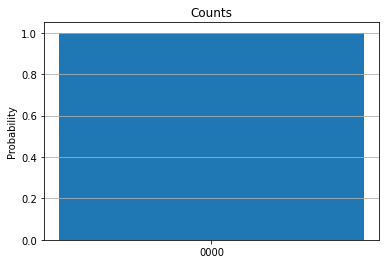

In [ ]:
counts = simulate(program=program, measured=range(nqubits - 1), shots=1)
plot_histogram(counts=counts)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dedd1051-cb34-4841-b8e5-79089caae121' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>